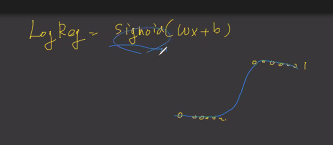

In [1]:
import pandas as pd
import numpy as np

In [2]:
FILE_PATH = "/content/drive/MyDrive/멀티캠퍼스 9회차 I반/강사님과 머신러닝 프로젝트/data/criteo_attribution_dataset_sampled_campaign_300_journey_over_2_points_balanced.csv"
df = pd.read_csv(FILE_PATH)
df.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,...,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,jid
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,...,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949
1,1,1398349,225512,32320979,28874676,0,-1,-1,0,1,...,30763035,9312274,1461750,29196072,26611394,1973606,30600973,9068204,15351053,32320979_-1
2,2,6206408,991626,29070160,27118781,1,1189040,23460283,1,1,...,30763035,9312274,23032073,29196072,11409686,1973606,9312274,14911188,21091111,29070160_23460283
3,3,12718518,2034017,2567135,10341182,1,2448781,2329559,0,1,...,25259032,7477605,28051086,23549932,32440044,28928366,11989417,29196072,32145478,2567135_2329559
4,4,4850218,748516,12566673,28137208,0,-1,-1,0,0,...,28928366,26597095,29562678,29196072,32440047,1973606,27807725,14911188,18291877,12566673_-1


- 데이터셋 출처 = 광고 리타겟팅 회사 Criteo

- **Timestamp**: 캠페인이 노출된 시간
- **UID**: 사용자 고유 ID
- **Campaign**: 캠페인 ID
  - 채널 내 캠페인
- **Conversion**: 노출된지 30일 이내에 구매로 전환 되었으면 1, 아니면 0
- **Conversion Timestamp**: 전환 되었을 때의 시간. 전환되지 않았으면 -1
- **Conversion ID**: 전환이 일어났을 때 ID

1번 캠페인: A가 신발신고나옴
2번 캠페인 : B가 신발신고나옴 > 이거보고 전환됐다 ID

- **Click**: 노출된 캠페인을 보고 클릭했으면 1, 클릭하지 않았으면 0
- **Cost**: 광고에 지불한 비용(클릭 당 비용)
- **Cat1-Cat9**: 카테고리 별 광고(캠페인의)의 id
- **jid** : user의 id와 conversion id를 합쳐서 유저 별 conversion을 표시
  - 사용자가 여러 개의 캠페인에 걸쳐 전환된 것을 하나로 묶어서 표현하기 위함
  - A라는 사용자가 1번 컨버전이면 A_1
  - A라는 사용자가 2번 컨버전이면 A_2

In [3]:
# jid 확인하기
df[['uid', 'conversion_id', 'jid']].head(10)


,uid,conversion_id,jid
0,21670661,17559949,21670661_17559949
1,32320979,-1,32320979_-1
2,29070160,23460283,29070160_23460283
3,2567135,2329559,2567135_2329559
4,12566673,-1,12566673_-1
5,424335,-1,424335_-1
6,14645400,4899465,14645400_4899465
7,22747856,-1,22747856_-1
8,7269593,-1,7269593_-1
9,10337898,28367511,10337898_28367511


In [4]:
# 	21670661이 유저에 대해서 보자
df.loc[df['uid'] == 21670661]

# 오랜시간동안 동일한 캠페인이 노출이 됐군
# 10번광고하면 4번은 사는사람
# 10474106 이 캠패인을 보고 구매한거

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,...,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,jid
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,...,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949
86085,86085,8910755,1415852,21670661,10474106,0,-1,-1,0,0,...,30763035,9312274,7726221,29196072,11409684,30763035,8549927,29196072,8661620,21670661_-1
92752,92752,8942502,1420110,21670661,10474106,1,1420115,17559949,0,1,...,30763035,9312274,7726221,29196072,11409684,32440053,8549927,29196072,8661620,21670661_17559949
186465,186465,10424011,1677968,21670661,10474106,0,-1,-1,0,0,...,28928366,9312274,7726221,23549932,11409684,30763035,4733288,29196072,21091108,21670661_-1
217423,217423,564852,83349,21670661,10474106,0,-1,-1,0,0,...,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,6083947,21670661_-1
221879,221879,3474720,548050,21670661,10474106,1,1420115,17559949,0,1,...,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,29520629,21670661_17559949
226573,226573,12465459,1978991,21670661,10474106,0,-1,-1,0,0,...,28928366,9312274,30867372,29196072,11409684,30763035,8549927,29196072,8661623,21670661_-1
256436,256436,2824629,459388,21670661,10474106,1,1420115,17559949,0,1,...,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,21091108,21670661_17559949
291482,291482,565299,83500,21670661,10474106,1,1420115,17559949,0,1,...,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,6083947,21670661_17559949
307783,307783,137968,35546,21670661,10474106,0,-1,-1,0,0,...,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,8661620,21670661_-1


In [5]:
df.info()
# 데이터존나큼. 코랩의 램이 부족함 > 자주 노출되는 캠패인 상위 50개만쓸꺼

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602160 entries, 0 to 602159
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             602160 non-null  int64  
 1   Unnamed: 0.1           602160 non-null  int64  
 2   timestamp              602160 non-null  int64  
 3   uid                    602160 non-null  int64  
 4   campaign               602160 non-null  int64  
 5   conversion             602160 non-null  int64  
 6   conversion_timestamp   602160 non-null  int64  
 7   conversion_id          602160 non-null  int64  
 8   attribution            602160 non-null  int64  
 9   click                  602160 non-null  int64  
 10  click_pos              602160 non-null  int64  
 11  click_nb               602160 non-null  int64  
 12  cost                   602160 non-null  float64
 13  cpo                    602160 non-null  float64
 14  time_since_last_click  602160 non-nu

In [6]:
# 자주 노출되는 50개의 캠페인만 사용
# 아무거나 세도되는데 null값없는 timestamp로세겠다.
campaign_cnt_df = df.groupby('campaign')['timestamp'].count().sort_values(ascending=False).head(50).reset_index()
campaign_cnt_df = campaign_cnt_df.rename(columns={'timestamp':'camp_cnt'})
campaign_cnt_df

,campaign,camp_cnt
0,10341182,56151
1,30801593,39373
2,15398570,32891
3,15184511,31525
4,28351001,29132
5,29427842,15714
6,5061834,12954
7,18975823,12164
8,30491418,12142
9,6686701,9742


In [7]:
# 50개의 캠페인에 해당하는 자료만 가져올거
df_part = df.merge(campaign_cnt_df, on='campaign')
df = df_part
df.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,...,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,jid,camp_cnt
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,...,9312274,30867372,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949,7890
1,55,7851159,1238119,3661462,10474106,1,1672978,24286866,0,1,...,9312274,30867372,29196072,11409684,28928366,8549927,29196072,29520629,3661462_24286866,7890
2,76,9578475,1531823,8030609,10474106,1,1531964,16414421,0,1,...,9312274,7726221,29196072,11409684,32440041,8549927,29196072,9491351,8030609_16414421,7890
3,89,2626351,415988,25962703,10474106,1,1389157,8416473,0,1,...,9312274,30867372,29196072,11409684,1973606,8549927,14911188,9491354,25962703_8416473,7890
4,137,8769546,1373396,4813350,10474106,1,1710543,17834428,1,1,...,9312274,30867372,29196072,11409684,27093701,8549927,29196072,8661623,4813350_17834428,7890


In [8]:
# 유저는 전환되기전까지 얼마나 많은 캠페인에 노출되었을까?
# jid별 count
event_count_per_jid = df.groupby('jid')['timestamp'].count().reset_index().rename(columns=({'timestamp':'event_count'}))
event_count_per_jid

,jid,event_count
0,10000148_-1,9
1,1000023_5282678,2
2,10000403_29178244,2
3,1000095_27795443,2
4,10001378_24057324,11
...,...,...
95383,9999096_16958422,2
95384,9999669_4594367,2
95385,9999748_-1,21
95386,9999748_25873601,11


In [9]:
event_joruney = event_count_per_jid.groupby('event_count')['jid'].count().reset_index().rename(columns=({'jid':'journey_count'}))
event_joruney

,event_count,journey_count
0,1,2653
1,2,36617
2,3,17702
3,4,10119
4,5,6548
...,...,...
99,212,1
100,227,1
101,231,1
102,240,1


In [10]:
# jid별로 몇 종류의 캠페인을 보는지 확인
# 종류볼거라서 nunique
campaign_count_per_jid = df.groupby('jid')['campaign'].nunique().reset_index().rename(columns=({"campaign" :"campaign_count"}))
campaign_count_per_jid 

# A연예인이 광고한거 클릭 , B연예인이 광고한거 클릭 > campagin수 = 2

,jid,campaign_count
0,10000148_-1,1
1,1000023_5282678,1
2,10000403_29178244,1
3,1000095_27795443,1
4,10001378_24057324,1
...,...,...
95383,9999096_16958422,1
95384,9999669_4594367,1
95385,9999748_-1,1
95386,9999748_25873601,1


In [11]:
jid_count_per_event_count = campaign_count_per_jid.groupby('campaign_count')['jid'].count().reset_index().rename(columns=({"jid" : "jid_count"}))
jid_count_per_event_count

,campaign_count,jid_count
0,1,89749
1,2,5120
2,3,472
3,4,44
4,5,3


## 모델의 목적
- 우리가 산정한 마케팅 예산을 각 캠페인에 분배할 예정
- 각 캠페인의 유저 전환에 대한 상대적인 기여도 파악
- 유저에게 노출된 캠페인과 해당 캠페인의 카테고리 등의 Feature를 모아서 전환하는 예측 모델을 생성

## 데이터 전처리 수행
- campaign과 cat 데이터들은 카테고리 형식의 데이터이기 때문에 숫자에 의미가 없음
- One hot encoding을 진행할거.

In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder_camp = OneHotEncoder()
encoder_cat = OneHotEncoder()

camp_ohe = encoder_camp.fit_transform(df[['campaign']]).toarray() #[[]] 2개 써줘야 하나봥
cat_ohe = encoder_cat.fit_transform(df[['cat1','cat2','cat3','cat4','cat5','cat6','cat8']]).toarray()
# ram이 부족해서 몇개빼서사용할거..

In [13]:
cat_ohe.shape

(451364, 324)

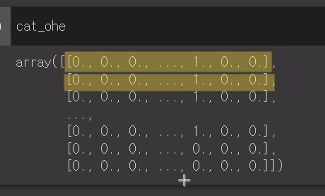

이거 하나하나를 np.array로 감싸주는

map은 함수를 적용시켜주는느낌?

In [14]:
# 원본 데이터 백업
df_preprocessed = df.copy()
df_preprocessed['cats'] = list(map(np.array, cat_ohe))
df_preprocessed['campaigns'] = list(map(np.array, camp_ohe))

df_preprocessed.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,...,cat4,cat5,cat6,cat7,cat8,cat9,jid,camp_cnt,cats,campaigns
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,...,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,55,7851159,1238119,3661462,10474106,1,1672978,24286866,0,1,...,29196072,11409684,28928366,8549927,29196072,29520629,3661462_24286866,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,76,9578475,1531823,8030609,10474106,1,1531964,16414421,0,1,...,29196072,11409684,32440041,8549927,29196072,9491351,8030609_16414421,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,89,2626351,415988,25962703,10474106,1,1389157,8416473,0,1,...,29196072,11409684,1973606,8549927,14911188,9491354,25962703_8416473,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,137,8769546,1373396,4813350,10474106,1,1710543,17834428,1,1,...,29196072,11409684,27093701,8549927,29196072,8661623,4813350_17834428,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Logistic Regression 을 활용한 마케팅 예산 분배 최적화
* conversion 을 예측하는 모델을 만들고, 전환을 예측했을 때의 logistic regression 의 각 캠페인에 대한 학습된 가중치 (딥러닝에서는 weight, 회귀분석에서는 coefficient 라고 한다) 를 가져온다
* Logistic Regression 의 Weight  =>  attribution weights

가중치를 기여도로 볼수가있다

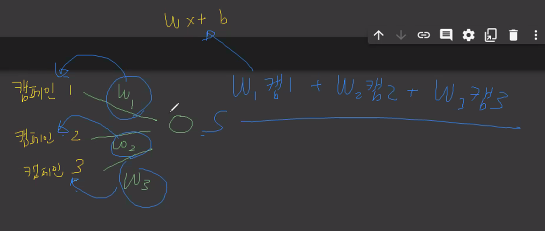

선형회귀에다가 sigmoid씌운거. logistic regression


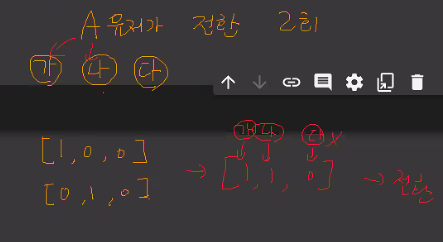

many hot 벡터라고함

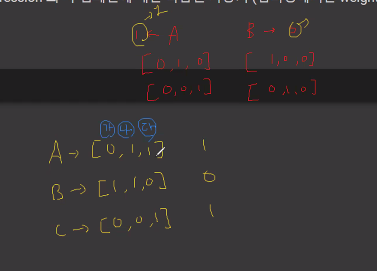

다 라는 캠페인이 구매에 중요한역할을 하는군

In [15]:
# 전환이 몇번일어난게 중요한게아니라 전환이 됐냐 안됐냐가 중요

test_data = pd.Series([[0,0,0],
                       [1,0,1]]) # 원핫인코딩이 되어있는 데이터

np.max(test_data.tolist(), axis=0)

array([1, 0, 1])

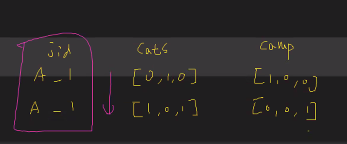

jid별로 집계할거

In [16]:
# series : cats, campaigns

def pairwise_max(series):
  return np.max(series.tolist(), axis=0).tolist()


In [17]:
# feature별 각기 다른 집계를 하기 위해 딕셔너리로 정리
aggregations = {
    'campaigns' : pairwise_max, # many hot 벡터로만들어줄거고
    'cats' : pairwise_max, # many hot 벡터로 만들어줄거고
    'click' : 'sum',
    'cost' : 'sum',
    'conversion' : 'max'
}

In [18]:
df_agg = df_preprocessed.groupby('jid').agg(aggregations)
df_agg.head()

,campaigns,cats,click,cost,conversion
jid,,,,,
10000148_-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",0,0.001278,0
1000023_5282678,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",2,0.002972,1
10000403_29178244,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",2,0.000671,1
1000095_27795443,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",2,0.001216,1
10001378_24057324,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",11,0.057412,1


In [19]:
df_agg['features'] = df_agg[['campaigns', 'cats', 'click','cost']].values.tolist()
df_agg[['features']].head()

,features
jid,
10000148_-1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1000023_5282678,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10000403_29178244,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1000095_27795443,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10001378_24057324,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


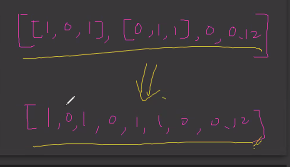

이러케 머신러닝에 들어가도록 펴줄거. H Stack

In [20]:
X = np.stack(df_agg['features'].map(lambda x : np.hstack(x)).values)
y = df_agg['conversion'].values

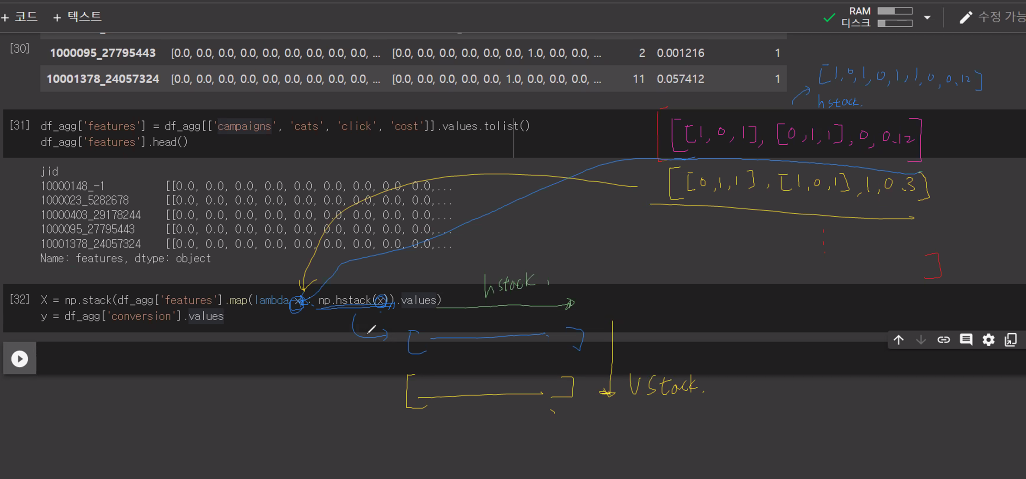

각각의 배열을 hstack하고 그행들을 vstack으로 쌓는거

In [21]:
X.shape, y.shape

((95388, 376), (95388,))

In [22]:
df_agg['features'].shape # 이었음 피기전에

(95388,)

# 데이터 분할

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify = y, # 균등하게 분할될수있게
    random_state=42
)

# 모델만들고 훈련

In [24]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=376),
    Dense(1, activation='sigmoid')]
)

# 이게 logistic regression모델 sigmoid(Wx+b)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 377       
                                                                 
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


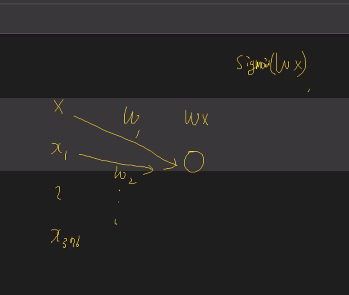


In [25]:
model.compile(
    optimizer='adam',
    loss = 'mse', # MSE 혹은 binary cross entropy error(뉴런이 2개일때)
    metrics='accuracy'
)

In [26]:
model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
954/954 [==============================] - 6s 3ms/step - loss: 0.1607 - accuracy: 0.8105 - val_loss: 0.1350 - val_accuracy: 0.8433
Epoch 2/10
954/954 [==============================] - 3s 3ms/step - loss: 0.1299 - accuracy: 0.8501 - val_loss: 0.1212 - val_accuracy: 0.8634
Epoch 3/10
954/954 [==============================] - 3s 3ms/step - loss: 0.1204 - accuracy: 0.8652 - val_loss: 0.1148 - val_accuracy: 0.8722
Epoch 4/10
954/954 [==============================] - 3s 3ms/step - loss: 0.1155 - accuracy: 0.8710 - val_loss: 0.1113 - val_accuracy: 0.8755
Epoch 5/10
954/954 [==============================] - 3s 3ms/step - loss: 0.1125 - accuracy: 0.8736 - val_loss: 0.1089 - val_accuracy: 0.8771
Epoch 6/10
954/954 [==============================] - 3s 3ms/step - loss: 0.1104 - accuracy: 0.8751 - val_loss: 0.1073 - val_accuracy: 0.8789
Epoch 7/10
954/954 [==============================] - 3s 3ms/step - loss: 0.1089 - accuracy: 0.8767 - val_loss: 0.1061 - val_accuracy: 0.8811
Epoch 

# 각 캠페인의 기여도(가중치)
50개의 캠페인 x1~ x50
 그러므로 w1~w50이 캠페인을 위한 가중치

x51~ 카테고리에대한정보

In [27]:
n_campaigns = 50 # 캠페인 50개
keras_logreg = model.get_layer('dense').get_weights()[0].flatten()[:n_campaigns]
keras_logreg

# [가중치], [편향]들어있어서

array([-0.22647297, -0.38854846, -0.26369768,  0.01162104, -0.06121381,
       -0.10390583, -0.06410321, -0.02820153, -0.6716607 , -0.32847255,
       -0.17299826, -0.13345057, -0.27434772, -0.5012084 , -0.54729086,
        0.15278392, -0.704619  , -0.17358242, -0.2409769 , -0.18714319,
       -0.29211313, -0.39445648, -0.04085072, -0.22171481,  0.18391287,
       -0.18638453, -0.48345044, -0.5384383 , -0.35336545, -0.36443156,
       -0.04047175, -0.44642994, -0.2838212 , -0.46368903, -0.06518966,
       -0.32232645, -0.05192456, -0.30507225, -0.5051039 , -0.03786118,
       -0.143642  , -1.336159  , -0.34311664, -0.05059804,  0.32189247,
       -0.14580297, -0.9918267 , -0.4930816 , -0.32531384, -0.21959779],
      dtype=float32)

In [28]:
# 위의값들은 사람이 뭔지 비교못하기때문에
# 기여도 값을 기여도 율로 바꾸자 - softmax활용
from sklearn.utils.extmath import softmax
keras_logreg_attrib = softmax([keras_logreg]).flatten()
keras_logreg_attrib


array([0.0203086 , 0.01726997, 0.01956651, 0.02576813, 0.02395803,
       0.02295674, 0.0238889 , 0.02476214, 0.0130118 , 0.01833927,
       0.02142415, 0.02228841, 0.01935923, 0.01542992, 0.01473501,
       0.02967489, 0.01258994, 0.02141164, 0.02001617, 0.02112325,
       0.01901835, 0.01716823, 0.02445089, 0.02040546, 0.03061317,
       0.02113928, 0.01570638, 0.01486603, 0.01788839, 0.01769152,
       0.02446016, 0.01629873, 0.0191767 , 0.01601985, 0.02386296,
       0.01845233, 0.02418162, 0.01877348, 0.01536994, 0.02452409,
       0.02206241, 0.00669498, 0.01807267, 0.02421372, 0.03514245,
       0.02201479, 0.00944694, 0.01555583, 0.01839729, 0.0204487 ],
      dtype=float32)

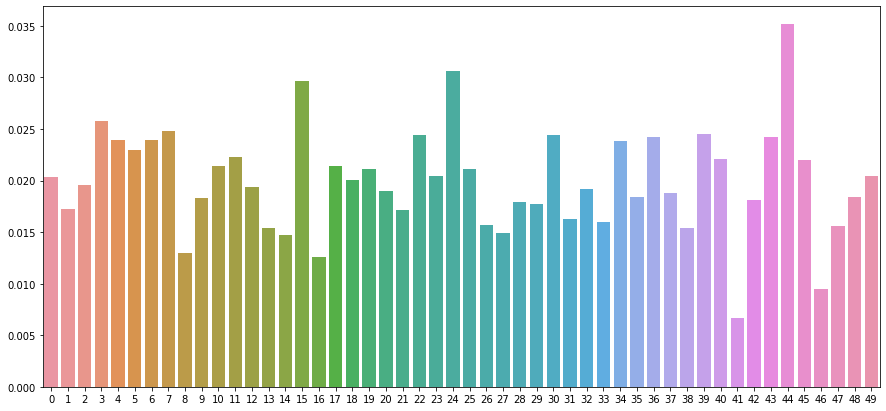

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15,7))
sns.barplot(x=np.arange(len(keras_logreg_attrib)), y=keras_logreg_attrib)
plt.show()

# 머신러닝(logistic regression)으로 얻어낸 기여도

In [30]:
# 15, 24, 44가 전환에 가장 영향을 많이주는 캠페인인가보다!

In [31]:
# 전통적인 방법으로도 기여도를 얻어보자. Last interaction Attribition Model 사용할거
df_preprocessed.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,...,cat4,cat5,cat6,cat7,cat8,cat9,jid,camp_cnt,cats,campaigns
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,...,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,55,7851159,1238119,3661462,10474106,1,1672978,24286866,0,1,...,29196072,11409684,28928366,8549927,29196072,29520629,3661462_24286866,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,76,9578475,1531823,8030609,10474106,1,1531964,16414421,0,1,...,29196072,11409684,32440041,8549927,29196072,9491351,8030609_16414421,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,89,2626351,415988,25962703,10474106,1,1389157,8416473,0,1,...,29196072,11409684,1973606,8549927,14911188,9491354,25962703_8416473,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,137,8769546,1373396,4813350,10474106,1,1710543,17834428,1,1,...,29196072,11409684,27093701,8549927,29196072,8661623,4813350_17834428,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [32]:
df_preprocessed['campaigns'].head()


# 행 : 데이터의개수
# 열 : 50개
# 50개의 캠페인 원핫인코딩된거

0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: campaigns, dtype: object

In [33]:
df_preprocessed['campaigns'].values[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
# 0번캠페인이 전환된횟수 / 0번캠페인은 100번등장
# 전환된횟수 / 전체노출횟수 구할거

In [35]:
# 전체노출횟수
n_campaigns = 50
def count_by_campaign(df):
  result = np.zeros(n_campaigns) # n_campaigns = 50
  
  for campaign_one_hot in df['campaigns'].values:
    campaign_idx = np.argmax(campaign_one_hot) # 1.0인 위치의 인덱스 찾아내기!!
    result[campaign_idx] += 1

  return result

In [36]:
campaign_impressions = count_by_campaign(df_preprocessed)
campaign_impressions

array([ 2857.,  8113.,  3482.,  2849., 12954.,  9742.,  3301.,  5440.,
        6434.,  9364.,  2705.,  7374.,  4329.,  2760., 56151.,  7890.,
        3427.,  3124.,  2897.,  5199.,  3645.,  3604.,  6717.,  5682.,
        7752., 31525., 32891.,  5337.,  4396.,  6211., 12164.,  4946.,
        3014.,  8565.,  8317.,  3108.,  9387.,  5931.,  2860., 29132.,
        4190.,  3917., 15714.,  2647., 12142.,  7504.,  2572., 39373.,
        4397.,  3332.])

In [37]:
# 전환된 데이터만 구하기 -1버려
df_conv = df_preprocessed.loc[df_preprocessed['conversion']==1, :]
df_conv

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,...,cat4,cat5,cat6,cat7,cat8,cat9,jid,camp_cnt,cats,campaigns
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,...,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,55,7851159,1238119,3661462,10474106,1,1672978,24286866,0,1,...,29196072,11409684,28928366,8549927,29196072,29520629,3661462_24286866,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,76,9578475,1531823,8030609,10474106,1,1531964,16414421,0,1,...,29196072,11409684,32440041,8549927,29196072,9491351,8030609_16414421,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,89,2626351,415988,25962703,10474106,1,1389157,8416473,0,1,...,29196072,11409684,1973606,8549927,14911188,9491354,25962703_8416473,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,137,8769546,1373396,4813350,10474106,1,1710543,17834428,1,1,...,29196072,11409684,27093701,8549927,29196072,8661623,4813350_17834428,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451354,600458,7090228,1104874,14439730,2869134,1,1496028,25007686,0,1,...,29196072,11409685,1973606,11626500,5824233,16022563,14439730_25007686,2849,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
451355,600487,10875522,1746911,23517203,2869134,1,2992663,8828235,0,1,...,29196072,11409685,29196072,29351419,29196072,8661620,23517203_8828235,2849,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
451357,600725,573827,87683,18722528,2869134,1,851642,8683367,1,1,...,29196072,11409685,3808271,32127685,29196072,18291877,18722528_8683367,2849,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
451358,601124,15393151,2486282,15627508,2869134,1,2486843,27464470,1,1,...,29196072,11409685,28928366,32127685,29196072,8661620,15627508_27464470,2849,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [38]:
# jid별 제일 마지막에 노출된 데이터의 인덱스

# 시간순서대로 되어있기때문에 젤 마지막시간꺼
idx = df_conv.groupby(['jid'])[['timestamp']].transform(max) # jid별 시간 최대값으로 '바꿔주기'⭐⭐⭐
idx

# 그냥 .max해버리면 최대값만 나오고 나머지자료 다사라짐. 데이터개수 그대로 전부 최대값으로 바꿔주는거
# ex 1,2,3 > 3 3 3으로

,timestamp
0,1420110
1,1672970
2,1531823
3,1389045
4,1710257
...,...
451354,1104874
451355,1746911
451357,851619
451358,2486282


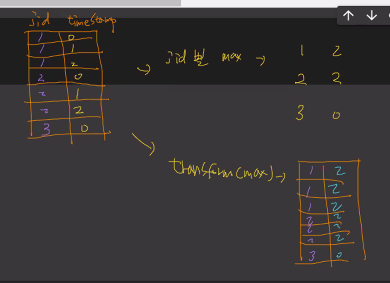

In [39]:
idx = df_conv.groupby(['jid'])['timestamp'].transform(max) == df_conv['timestamp'] # 최대값인지 하나하나비교
idx

0         False
1         False
2          True
3         False
4         False
          ...  
451354     True
451355     True
451357    False
451358     True
451361     True
Name: timestamp, Length: 238831, dtype: bool

In [40]:
df_last_conv = df_conv[idx]
df_last_conv.head()

# timestamp가 max였던 것들만 남음

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,...,cat4,cat5,cat6,cat7,cat8,cat9,jid,camp_cnt,cats,campaigns
2,76,9578475,1531823,8030609,10474106,1,1531964,16414421,0,1,...,29196072,11409684,32440041,8549927,29196072,9491351,8030609_16414421,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
13,1112,5733111,907819,1382856,10474106,1,2999687,7740383,0,1,...,29196072,11409684,32440041,8549927,29196072,16022558,1382856_7740383,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
18,1372,2082516,333082,19896277,10474106,1,506082,12500469,1,1,...,29196072,11409684,28928366,8549927,29196072,29520629,19896277_12500469,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
22,1610,2182646,365558,11174755,10474106,1,369350,31240997,1,1,...,6755486,11409684,1973606,8549927,3225256,9491351,11174755_31240997,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28,2352,16059197,2616742,11270325,10474106,1,3946111,2874497,0,1,...,29196072,11409684,29196072,8549927,29196072,29520626,11270325_2874497,7890,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [41]:
# 사용자가 전환 되었을 때의 마지막 캠페인 노출 횟수
campaing_conversions = count_by_campaign(df_last_conv)
campaing_conversions

array([ 606.,  638.,  369.,  906., 1694., 1374.,  386., 1292.,  816.,
       1122.,  358.,  571.,  482.,  168., 8413., 1173.,  285.,  409.,
        186.,  456.,  174.,  154., 1668.,  862., 1310., 7052., 4465.,
        376.,  752.,  670., 2023.,  553.,  528.,  481., 1990.,  312.,
        734.,  567.,  168., 3920.,  531.,   39., 2686.,  601., 1546.,
       1073.,   70., 3868.,  352.,  279.])

In [42]:
lta = campaing_conversions / campaign_impressions
lta
# 합이 1이아닐수도있음

array([0.21211061, 0.07863922, 0.10597358, 0.31800632, 0.13077042,
       0.1410388 , 0.11693426, 0.2375    , 0.12682624, 0.11982059,
       0.1323475 , 0.07743423, 0.11134211, 0.06086957, 0.14982814,
       0.1486692 , 0.08316312, 0.1309219 , 0.06420435, 0.08770917,
       0.04773663, 0.0427303 , 0.24832515, 0.15170715, 0.16898865,
       0.22369548, 0.13575142, 0.07045156, 0.1710646 , 0.10787313,
       0.16631042, 0.11180752, 0.17518248, 0.05615879, 0.23926897,
       0.1003861 , 0.07819325, 0.09559939, 0.05874126, 0.13455993,
       0.12673031, 0.0099566 , 0.17093038, 0.22704949, 0.12732663,
       0.14299041, 0.02721617, 0.09823991, 0.08005458, 0.08373349])

In [43]:
lta_sum = lta.sum()
lta_norm = lta / lta_sum

# 합을 1로 만들어주기
lta_norm.sum()

0.9999999999999998

In [44]:
keras_logreg_attrib.sum()

1.0

In [45]:
# 두개의 데이터 합치기
data1 = pd.DataFrame({'attribution' : keras_logreg_attrib, 'method': 'logstic', 'campaign' : range(0,50)})
data2 = pd.DataFrame({'attribution' : lta_norm, 'method' : 'last', 'campaign' : range(0,50)})

total = pd.concat([data1, data2])
total.head()

,attribution,method,campaign
0,0.020309,logstic,0
1,0.017270,logstic,1
2,0.019567,logstic,2
3,0.025768,logstic,3
4,0.023958,logstic,4


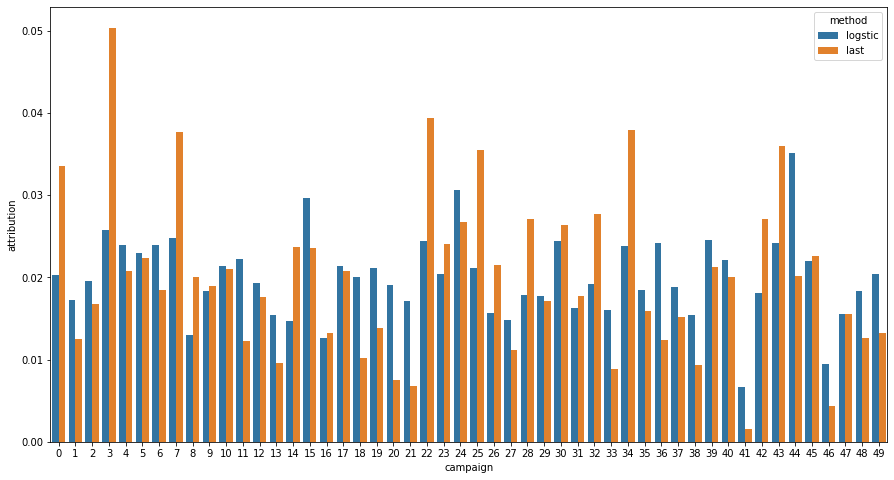

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(data=total, x='campaign', y='attribution', hue='method')
plt.show()

# 마케팅 예산 분배 시뮬레이션
  - 예산을 지정한다
  - 예산을 캠페인의 기여도에 맞게 분배한다.
  - 과거 유저의 전환 내역을 replay한다.
    - 캠페인이 노출되었다면 각 캠페인의 예산을 차감하고
    - 전환이 실제 되었다면 전환에 +1을 해준다
    - 캠페인이 과거에 노출되었는데, 해당 캠페인에 대한 예산은 다 쓴 상태라면 blacklist에 넣어준다.

  - 계산은 conversion-blacklist로 한다

In [58]:
def get_campaign_id(x_journey_step, n_campaigns=50):

  '''
  x_journey_step : 각 행(유저 한명한명의 데이터)의 캠페인
  '''

  return np.argmax(x_journey_step[0:n_campaigns]) # 한 사람한테 노출된 캠페인의 인덱스 0~49

# 1사람이 10번보고 전환은 1번만 일어났을수도 있기 때문에
# 각행을 다받아와야함


def simulate_budget_roi(df, budget_total, attribution):
  # 기여도에 따른 예산 분배 후 캠페인 별 시뮬레이션 진행
  # ex) 예산이 100만원일때 기여도가 0.5이면 50만원을 가질 수 있도로 한다.
  
  # 예산구하기(올림처리) 41.12123424원입니다. > 깔끔하게 42마넌이요
  # buegets = np.ceil(budget_total * attribution) # ceil은 올림함수 floor은 내림함수 소수점을 그냥 버림은 trunc

  # 방어코드 작성 스타일(attribution합이 1이 아니었을수도 있으니까 혹시몰라서)
  budgets = np.ceil(attribution * (budget_total / np.sum(attribution)))

  # 예산을 다 써서 시뮬레이션을 진행할 수 없는 경우
  blacklist = set()

  # 전환이 일어난 경우
  conversions = set()

  # 데이터 세트를 모두 돌면서 시뮬레이션 시작
  for i in range(df.shape[0]):

    # 해당 이벤트에서 노출된 캠페인 id를 가져오기
    campaign_id = get_campaign_id(df.loc[i]['campaigns'])

    # 해당 jid를 가져온다.
    jid = df.loc[i]['jid']

    if jid not in blacklist: # jid가 blacklist에 없다 = 시뮬레이션 수행이 가능하다

      # 캠페인에 대한 예산이 있다
      if budgets[campaign_id] >= 1:
        # 예산에서 1원을 차감
        budgets[campaign_id] -= 1

        # 이사람한테 1만원을 썼으니 전환 여부 판단
        if df.loc[i]['conversion'] == 1:
          conversions.add(jid)


      else: # 예산이 없으면 이사람(jid)에대한 시뮬레이션은 멈춘다.
        blacklist.add(jid)


  return len(conversions.difference(blacklist))

  # 차집합 # 과거에 10개본사람이 시뮬레이션에선 예산때문에 5번밖에 못봤을수도있다.
  # 원래 10개를 봐서 전환되었던사람이 5번만봐서 전환됐다? 말안됨.
  # 광고다못본사람은 광고를 못봤으니까 converison이 안될걸로 판단하자.
  # 예산이 한정되어있어서그래. 과거에 전환이됐더라도 예산이 부족해서 못볼수도있음.
        


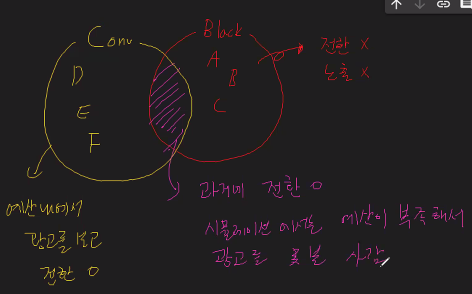

In [48]:
# 만개만돌릴겡..
df_preprocessed.shape

(451364, 28)

In [49]:
sample_data = df_preprocessed.sample(n=10000, random_state=42)
sample_data = sample_data.sort_values('timestamp') # 시간 순서대로 정렬

# pitch(attribution ** pitch) : 기여도의 피치제곱 각 캠페인 별 기여도의 격차를 크게 벌릴지 작게 벌릴지

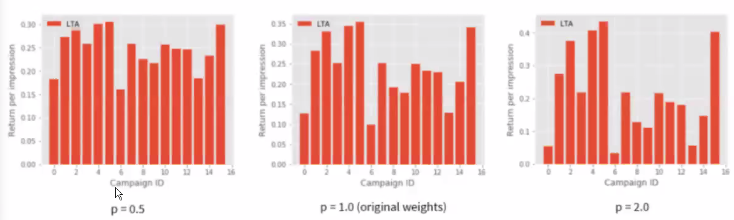

p = 0.5면 모든기여도가 비스무리하게
5마넌줄거 > 4마넌주고
1마넌줄거 > 2마넌줌

p = 2면 격차를 벌려줌
4마넌줄거 > 5마넌주고
2마넌줄거 > 만원바께안줌

In [50]:
pitches = np.arange(0,3,0.5)
pitches

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [51]:
# Last Interaction
budget_total = 5000 # 오천마넌 투입한다구하자
lta

array([0.21211061, 0.07863922, 0.10597358, 0.31800632, 0.13077042,
       0.1410388 , 0.11693426, 0.2375    , 0.12682624, 0.11982059,
       0.1323475 , 0.07743423, 0.11134211, 0.06086957, 0.14982814,
       0.1486692 , 0.08316312, 0.1309219 , 0.06420435, 0.08770917,
       0.04773663, 0.0427303 , 0.24832515, 0.15170715, 0.16898865,
       0.22369548, 0.13575142, 0.07045156, 0.1710646 , 0.10787313,
       0.16631042, 0.11180752, 0.17518248, 0.05615879, 0.23926897,
       0.1003861 , 0.07819325, 0.09559939, 0.05874126, 0.13455993,
       0.12673031, 0.0099566 , 0.17093038, 0.22704949, 0.12732663,
       0.14299041, 0.02721617, 0.09823991, 0.08005458, 0.08373349])

In [60]:
budget_lta = []

for pitch in pitches:
  conversion = simulate_budget_roi(sample_data.reset_index(), budget_total, lta**pitch)
  print(pitch, conversion)
  budget_lta.append(conversion)

0.0 1675
0.5 1807
1.0 1795
1.5 1730
2.0 1623
2.5 1491


In [62]:
# logistic regression
budget_total = 5000
budget_logreg = []

for pitch in pitches:
  conversion = simulate_budget_roi(sample_data.reset_index(), budget_total, keras_logreg_attrib ** pitch)
  print(pitch, conversion)
  budget_logreg.append(conversion)

0.0 1675
0.5 1761
1.0 1840
1.5 1884
2.0 1885
2.5 1842


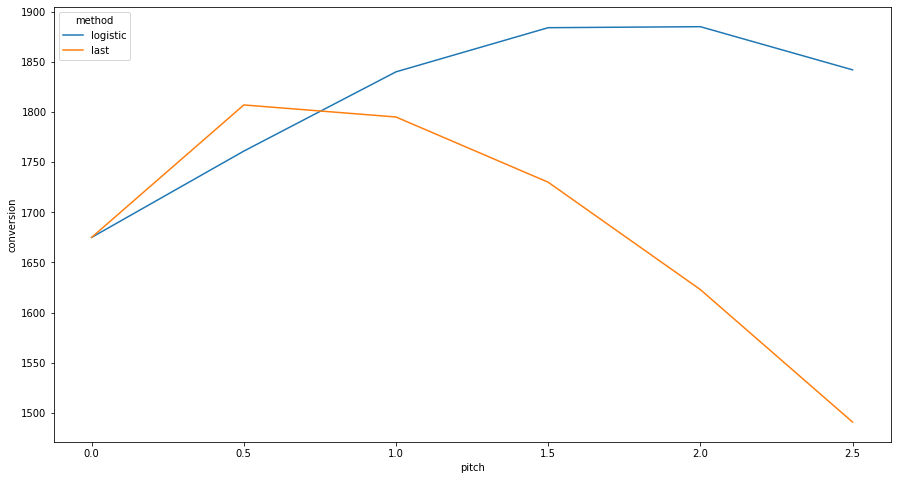

In [63]:
data1 = pd.DataFrame({"conversion":budget_logreg, "method": "logistic", "pitch": pitches})
data2 = pd.DataFrame({"conversion":budget_lta, "method": "last", "pitch": pitches})
total_simulated = pd.concat([data1, data2]).reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(data = total_simulated, x='pitch' , y='conversion', hue = 'method')
plt.show()

In [64]:
keras_logreg_attrib ** 1.5
# 예산분배 이게 best입니다 이렇게 하시면 됩니다

array([0.00289414, 0.00226954, 0.00273697, 0.00413642, 0.00370831,
       0.00347829, 0.00369228, 0.00389657, 0.00148425, 0.00248355,
       0.00313585, 0.0033275 , 0.00269359, 0.00191666, 0.00178865,
       0.00511192, 0.00141265, 0.00313311, 0.00283186, 0.00307002,
       0.00262276, 0.00224951, 0.00382333, 0.00291487, 0.00535627,
       0.00307351, 0.0019684 , 0.00181256, 0.00239253, 0.00235314,
       0.00382551, 0.0020808 , 0.00265559, 0.00202762, 0.00368627,
       0.00250655, 0.00376035, 0.00257227, 0.0019055 , 0.00384052,
       0.00327702, 0.0005478 , 0.00242959, 0.00376784, 0.00658792,
       0.00326642, 0.0009182 , 0.00194017, 0.00249535, 0.00292414],
      dtype=float32)

In [65]:
keras_logreg_attrib **1.5 * (budget_total / np.sum(keras_logreg_attrib ** 1.5))
# 예산은 이만큼씩 할당

array([ 99.946594,  78.3764  ,  94.518814, 142.84741 , 128.0633  ,
       120.119446, 127.50946 , 134.56445 ,  51.257122,  85.7672  ,
       108.293816, 114.912346,  93.02087 ,  66.190216,  61.769463,
       176.53539 ,  48.784714, 108.19896 ,  97.795654, 106.02031 ,
        90.57477 ,  77.68488 , 132.03531 , 100.6625  , 184.97394 ,
       106.14103 ,  67.97703 ,  62.595158,  82.62375 ,  81.26359 ,
       132.1104  ,  71.85861 ,  91.70838 ,  70.02218 , 127.30184 ,
        86.561554, 129.8602  ,  88.83113 ,  65.804596, 132.62872 ,
       113.16903 ,  18.917864,  83.90376 , 130.11887 , 227.50772 ,
       112.80278 ,  31.70915 ,  67.00204 ,  86.174545, 100.98265 ],
      dtype=float32)